# Pre-processing eyes pictures with Gaussian blur & Cropping

In [1]:
# Using keras for img_to_array

import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import cv2
%matplotlib inline

Using TensorFlow backend.


In [2]:
IMG_DIM = (150, 150) #setting image dim

train_files = glob.glob('training_data/*') #import training data
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] #change images files into arrays
train_imgs = np.array(train_imgs)

(150, 150, 3)


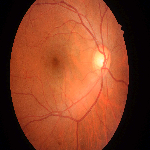

In [3]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [4]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [5]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

In [6]:
# Cropping and blurring our data

processed_data = []
IMG_SIZE = 150
for p in train_files:
    n = load_ben_color(p, sigmaX=10)
    processed_data.append(n)
    
processed_data = np.asarray(processed_data)

(150, 150, 3)


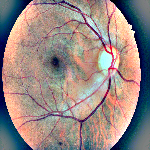

In [7]:
# Scalling image between 0 & 1 as it is better for deep learning

processed_imgs_scaled = processed_data.astype('float32')
processed_imgs_scaled /= 255

print(processed_data[0].shape)
array_to_img(processed_data[0])